In [1]:
import RungeKutta
import numpy as np
import pylab as plt
%matplotlib inline

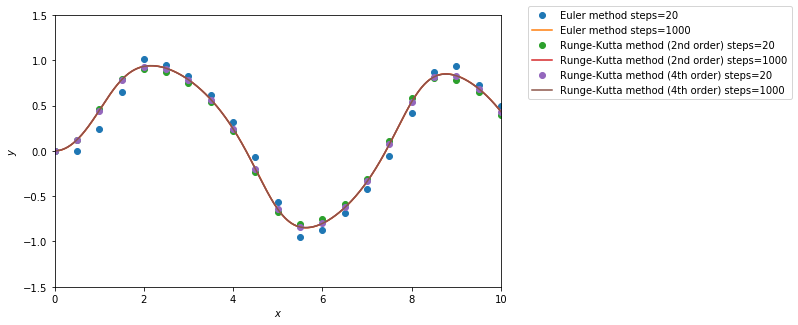

In [4]:
def f_Newman_8_7_vec(r, t):
    (x,) = r
    r_prime = [-x**3+np.sin(t)]
    #print ("t {}, x {}, rp {}".format(t,x,r_prime))
    return np.array(r_prime)

if __name__ == "__main__":
    interval = (0.,10.)
    r0 = [0.]

    #set up plot
    #plot the step size vs. error
    plt.figure(figsize=(8, 5))
    ax = plt.subplot(111)

    #more efficient way to do this
    i=0

    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_xlim(*interval)
    ax.set_ylim(-1.5,1.5)


    for order in [1, 2, 4]:
        # obtain solutions with different step sizes
        for steps in [20,1000]:  # Newman used [10,20,50,100]

            results = []    # to hold results with different step sizes

            solution = RungeKutta.vectorRungeKutta(f_Newman_8_7_vec, 1, r0, interval, steps, order=order)
            results.append(solution)

            # plot results

            if (order == 1):
                label = "Euler method"
            elif (order == 2):
                label = "Runge-Kutta method (2nd order)"
            elif (order == 4):
                label = "Runge-Kutta method (4th order)"

            if steps == 20:
                style='o'
            else:
                style='-'

            label = label + " steps=%d"%(steps)
            #for solution in results:
            plt.plot(solution[:,0],solution[:,1],style,label=label)

    plt.legend(bbox_to_anchor=(1.05, 1.05))
    plt.show()


            

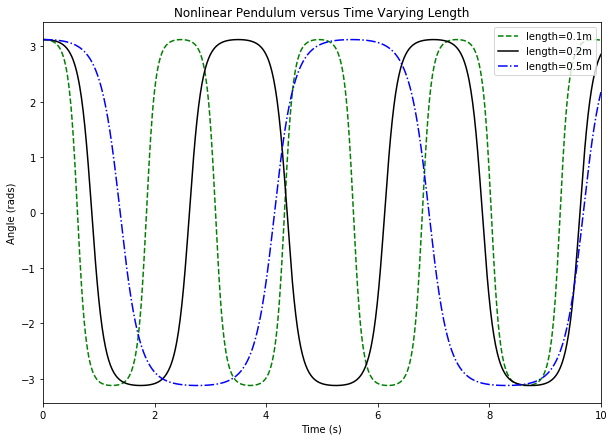

In [7]:
def f (r, t):
    """
    Description: calculates the values of the differential equations describe in Newman exercise 8.4
    
    Parameters:t - float
               r - touple (theta, omega) which are (float, float)
    
    Returned:numpy array [float, float]
    """
    #r = (theta, omega)
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g / l) * np.sin (theta)
    
    return np.array ([ftheta, fomega], float)

if __name__ == "__main__":
    styles = ["--g", "-k", "-.b"]
    numIndepVars = 2
    interval = (0, 10) #time


    #vary pendulum length
    g = 9.81 #m/s
    lengths = [0.1, 0.2, 0.5] #m
    theta0 = 179 / 180 * np.pi #rads
    omega0 = 0
    r0 = (theta0, omega0)


    #set up plot
    plt.figure(figsize=(10, 7))
    ax = plt.subplot(111)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Angle (rads)")
    ax.set_xlim(*interval)
    ax.set_title ("Nonlinear Pendulum versus Time Varying Length")

    for i in range (len (styles)):
        l = lengths[i]
        solution = RungeKutta.vectorRungeKutta (f, numIndepVars, r0, interval, steps, order = order)
        plt.plot(solution[:,0],solution[:,1], styles[i], label="length={}m".format (l))

    plt.legend (loc=1)
    plt.show ()